#### Activity 3 - Logistic Regression Practice (Iris Data Set and Heart Attack)

Basic Classification Algorithm - Binary Logistic Regression

We would need to practice using a few datasets to understand how logistic regression works.


##### Part 1 - Iris Data Set

Create a separate Jupyter Notebook.

The Iris Data set is comprised of the following features:

- sepal length
- sepal width
- petal length
- petal width
- Iris Species

For this part, create a program that will be based on the logistic regression for each of the Iris Species.

- Create a logistic regression that will determine if the species is SETOSA or not.
- Create a logistic regression that will determine if the species is VERSICOLOR or not.
- Create a logistic regression that will determine if the species is VIRGINICA or not.

The interface should look like the following:
![Iris Data Set UI](https://github.com/Pipaolo/cs-machine-learning/blob/main/images/iris-dataset-ui.png?raw=true)

##### Considerations:

1. Use the minimum and maximum values of the data for validation.

2. For each logistic regression, show the confusion matrix and accuracy of the model.

3. Display the probability of each species.

**\*Warning notes:** Since we will be using this method, there will be times wherein an entry will produce no species or more than one species. \*

##### Discussion of results and reflection

1. How accurate is each model?

2. Is logistic regression a good use case for classifying the iris data set? Elucidate your answer.

3. What are your recommendations for improving the classification of this data det? Explain.

4. Create a graphical model of how the selection of logistic regression works.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import cast
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
df = pd.read_csv("../datasets/iris.csv")

df.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


def load_data():
    df = pd.read_csv("../datasets/iris.csv")

    # Create a true target column for every species
    df["setosa"] = np.where(df["iris_species"] == "Iris-setosa", 1, 0)
    df["versicolor"] = np.where(df["iris_species"] == "Iris-versicolor", 1, 0)
    df["virginica"] = np.where(df["iris_species"] == "Iris-virginica", 1, 0)

    x = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

    # The y columns comprises of the target columns
    y = df[["setosa", "versicolor", "virginica"]]

    return x, y, df


def split_data(x, y):
    x_train, x_test, y_train, y_test = train_test_split(
        x,
        y,
        test_size=0.30,
    )
    # Transform the data
    # sc = StandardScaler()
    # x_train = sc.fit_transform(x_train)
    # x_test = sc.transform(x_test)

    return x_train, x_test, y_train, y_test


def predict_data(classifier, values):
    values = np.array(values).reshape(1, -1)

    predictions = classifier.predict(values)
    probabilities = classifier.predict_proba(values)

    return predictions, probabilities


def predict_data_from_test(classifier, x_test):
    y_pred = classifier.predict(x_test)
    y_probs = classifier.predict_proba(x_test)
    return y_pred, y_probs


def show_confusion_matrix(species: str, y_test, y_pred, ax=None):
    cm = confusion_matrix(y_test, y_pred)
    # Show the confusion matrix
    sns.heatmap(
        cm,
        annot=True,
        fmt="g",
        cmap="Blues",
        xticklabels=["Not " + species, species],
        yticklabels=["Not " + species, species],
        ax=ax,
    )
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

In [4]:
x, grouped_y, df = load_data()
x_train, x_test, y_train, y_test = split_data(x, grouped_y)

y_train.head()

,setosa,versicolor,virginica
8,1,0,0
30,1,0,0
17,1,0,0
68,0,1,0
130,0,0,1


In [5]:
# Create the different models for each species
setosa_y_train = y_train["setosa"]
setosa_y_test = y_test["setosa"]
setosa_classifier = LogisticRegression()
setosa_classifier.fit(x_train, setosa_y_train)


versicolor_y_train = y_train["versicolor"]
versicolor_y_test = y_test["versicolor"]
versicolor_classifier = LogisticRegression()
versicolor_classifier.fit(x_train, versicolor_y_train)

virginica_y_train = y_train["virginica"]
virginica_y_test = y_test["virginica"]
virginica_classifier = LogisticRegression()
virginica_classifier.fit(x_train, virginica_y_train)

LogisticRegression()

In [6]:
# Evaluate the different models for each species
from sklearn.model_selection import cross_val_score

setosa_cross_val_score = cross_val_score(
    setosa_classifier, x, grouped_y["setosa"], cv=10
)
versicolor_cross_val_score = cross_val_score(
    versicolor_classifier, x, grouped_y["versicolor"], cv=10
)
virginica_cross_val_score = cross_val_score(
    virginica_classifier, x, grouped_y["virginica"], cv=10
)

print("Setosa Cross Validation Score: ", setosa_cross_val_score.mean())
print("Versicolor Cross Validation Score: ", versicolor_cross_val_score.mean())
print("Virginica Cross Validation Score: ", virginica_cross_val_score.mean())

Setosa Cross Validation Score:  1.0
Versicolor Cross Validation Score:  0.6933333333333332
Virginica Cross Validation Score:  0.9666666666666666


/var/folders/pq/_2xfzl710x79r25081t4ksvw0000gn/T/ipykernel_5271/412389901.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


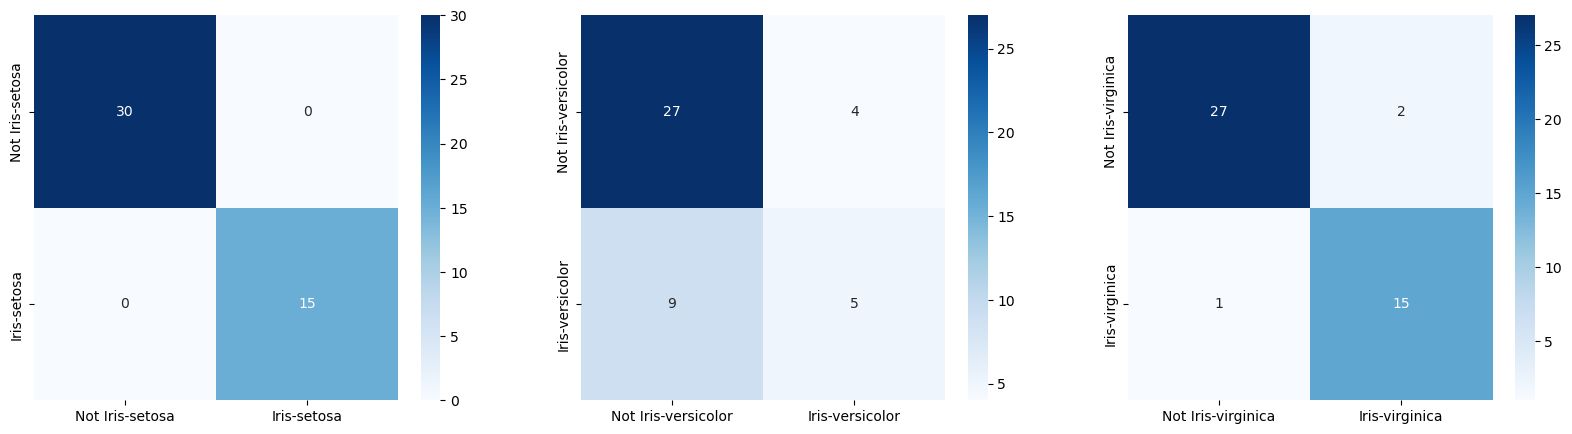

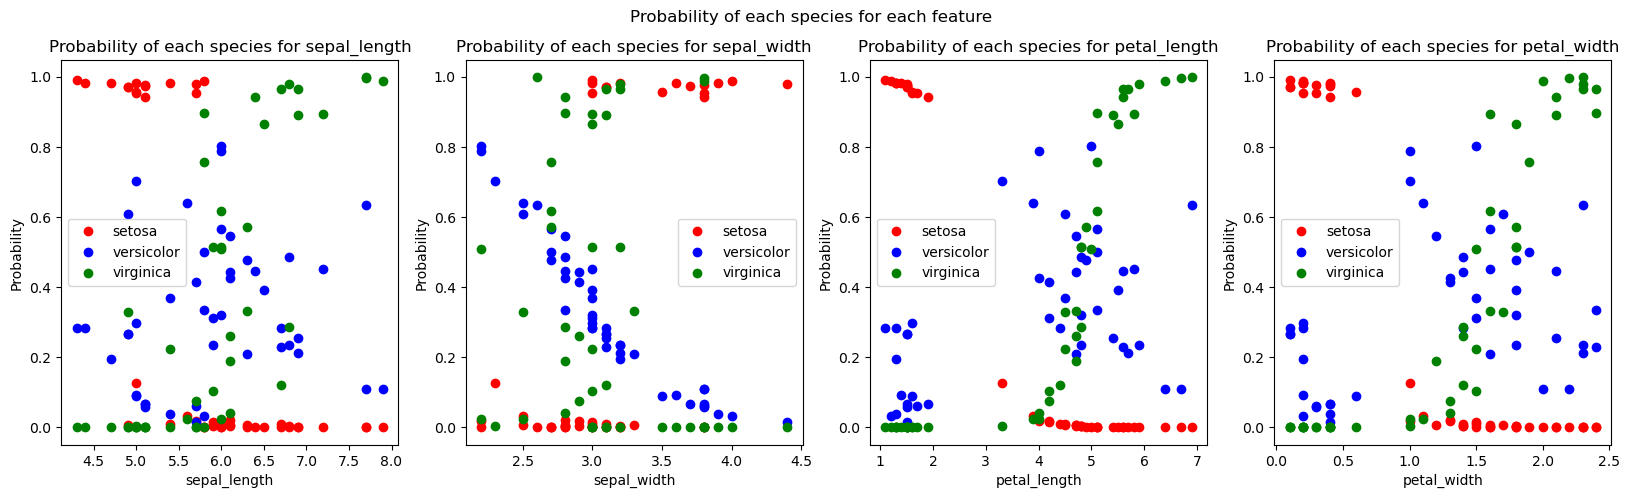

In [7]:
# Show the confusion matrix for each species
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.heatmap(
    confusion_matrix(setosa_y_test, setosa_classifier.predict(x_test)),
    annot=True,
    fmt="g",
    cmap="Blues",
    xticklabels=["Not Iris-setosa", "Iris-setosa"],
    yticklabels=["Not Iris-setosa", "Iris-setosa"],
    ax=ax[0],
)
sns.heatmap(
    confusion_matrix(versicolor_y_test, versicolor_classifier.predict(x_test)),
    annot=True,
    fmt="g",
    cmap="Blues",
    xticklabels=["Not Iris-versicolor", "Iris-versicolor"],
    yticklabels=["Not Iris-versicolor", "Iris-versicolor"],
    ax=ax[1],
)
sns.heatmap(
    confusion_matrix(virginica_y_test, virginica_classifier.predict(x_test)),
    annot=True,
    fmt="g",
    cmap="Blues",
    xticklabels=["Not Iris-virginica", "Iris-virginica"],
    yticklabels=["Not Iris-virginica", "Iris-virginica"],
    ax=ax[2],
)

fig.show()

# Show the predictions scatter plot graph for each species
setosa_probs = setosa_classifier.predict_proba(x_test)
versicolor_probs = versicolor_classifier.predict_proba(x_test)
virginica_probs = virginica_classifier.predict_proba(x_test)


"""
    Show the predictions graph for each species with their respective features:
    - sepal_length
    - sepal_width
    - petal_length
    - petal_width
"""

columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

columns_color_mapping = {0: "red", 1: "blue", 2: "green", 3: "orange"}

scatter_fig, scatter_ax = plt.subplots(1, 4, figsize=(20, 5))
scatter_fig.suptitle("Probability of each species for each feature")

for i in range(len(columns)):
    scatter_ax[i].scatter(
        x_test.iloc[:, i], setosa_probs[:, 1], color=columns_color_mapping[0]
    )
    scatter_ax[i].scatter(
        x_test.iloc[:, i], versicolor_probs[:, 1], color=columns_color_mapping[1]
    )
    scatter_ax[i].scatter(
        x_test.iloc[:, i], virginica_probs[:, 1], color=columns_color_mapping[2]
    )

    scatter_ax[i].set_xlabel(columns[i])
    scatter_ax[i].set_ylabel("Probability")
    scatter_ax[i].set_title("Probability of each species for " + columns[i])
    scatter_ax[i].legend(["setosa", "versicolor", "virginica"])

In [8]:
# Get the min and max values for each feature this will be used for validating the user input
sepal_length_min, sepal_length_max = x_test.iloc[:, 0].min(), x_test.iloc[:, 0].max()
sepal_width_min, sepal_width_max = x_test.iloc[:, 1].min(), x_test.iloc[:, 1].max()
petal_length_min, petal_length_max = x_test.iloc[:, 2].min(), x_test.iloc[:, 2].max()
petal_width_min, petal_width_max = x_test.iloc[:, 3].min(), x_test.iloc[:, 3].max()

min_max_dict = {
    "sepal_length": (sepal_length_min, sepal_length_max),
    "sepal_width": (sepal_width_min, sepal_width_max),
    "petal_length": (petal_length_min, petal_length_max),
    "petal_width": (petal_width_min, petal_width_max),
}

In [9]:
# Test if the program can predict the species based on random values
# rounded to 2 decimal places
import random

while True:
    sepal_length = random.uniform(sepal_length_min, sepal_length_max)
    sepal_length = round(sepal_length, 2)
    sepal_width = random.uniform(sepal_width_min, sepal_width_max)
    sepal_width = round(sepal_width, 2)
    petal_length = random.uniform(petal_length_min, petal_length_max)
    petal_length = round(petal_length, 2)
    petal_width = random.uniform(petal_width_min, petal_width_max)
    petal_width = round(petal_width, 2)
    input_values = np.array([sepal_length, sepal_width, petal_length, petal_width])
    predictions = {
        "setosa": setosa_classifier.predict(input_values.reshape(1, -1)),
        "versicolor": versicolor_classifier.predict(input_values.reshape(1, -1)),
        "virginica": virginica_classifier.predict(input_values.reshape(1, -1)),
    }

    if predictions["virginica"] == 1:
        print("Predicted species: Iris-virginica")
        print("Input values: ", input_values)
        break

Predicted species: Iris-virginica
Input values:  [4.66 4.15 5.99 1.81]


/Users/solstella/Documents/school/cs-machine-learning/env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/solstella/Documents/school/cs-machine-learning/env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/solstella/Documents/school/cs-machine-learning/env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### GUI


In [10]:
import customtkinter as ctk
import tkinter as tk

ctk.set_appearance_mode("light")
ctk.set_default_color_theme("green")


class App(ctk.CTk):
    def __init__(
        self,
        setosa_model: LogisticRegression,
        versicolor_model: LogisticRegression,
        virginica_model: LogisticRegression,
        min_max_dict: dict,
    ):
        super().__init__()

        # Set the models
        self.setosa_model = setosa_model
        self.versicolor_model = versicolor_model
        self.virginica_model = virginica_model

        self.title("Iris Species Predictor")
        self.geometry("500x500")

        # Configure the grid layout of 6x6
        self.grid_columnconfigure((0, 1, 2, 3, 4, 5), weight=1)
        self.grid_rowconfigure((0, 1, 2, 3, 4, 5), weight=1)

        # Create the form
        self.form_frame = ctk.CTkFrame(self)
        self.form_frame.grid(
            row=0, column=0, columnspan=4, rowspan=6, sticky="nsew", padx=10, pady=10
        )
        self.form_frame.grid_columnconfigure((0, 1), weight=1)

        # Get the min and max values for each feature this will be used for validating the user input
        sepal_length_min, sepal_length_max = min_max_dict["sepal_length"]
        sepal_width_min, sepal_width_max = min_max_dict["sepal_width"]
        petal_length_min, petal_length_max = min_max_dict["petal_length"]
        petal_width_min, petal_width_max = min_max_dict["petal_width"]

        # Create the input fields
        self.sepal_length_label, self.sepal_length_entry = self.input_field(
            "sepal_length",
            "Sepal Length",
            row=0,
            column=0,
            default_value=sepal_length_min,
            min=sepal_length_min,
            max=sepal_length_max,
        )

        self.sepal_width_label, self.sepal_width_entry = self.input_field(
            "sepal_width",
            "Sepal Width",
            row=3,
            column=0,
            default_value=sepal_width_min,
            min=sepal_width_min,
            max=sepal_width_max,
        )
        self.petal_length_label, self.petal_length_entry = self.input_field(
            "petal_length",
            "Petal Length",
            row=6,
            column=0,
            default_value=petal_length_min,
            min=petal_length_min,
            max=petal_length_max,
        )

        self.petal_width_label, self.petal_width_entry = self.input_field(
            "petal_width",
            "Petal Width",
            row=9,
            column=0,
            default_value=petal_width_min,
            min=petal_width_min,
            max=petal_width_max,
        )

        # Output Frame
        self.output_frame = ctk.CTkFrame(self)
        self.output_frame.grid(
            row=0, column=4, columnspan=3, rowspan=6, sticky="nsew", padx=10, pady=10
        )
        self.output_frame.grid_columnconfigure((0, 1, 2), weight=1)
        self.output_frame.grid_rowconfigure((0, 1), weight=0)

        # Create the output labels
        self.setosa_label = ctk.CTkLabel(
            self.output_frame,
            text="SETOSA",
            fg_color="transparent",
            font=("Arial", 12, "bold"),
        )
        self.setosa_label.grid(row=0, column=0, sticky="ew", padx=10, pady=4)
        self.versicolor_label = ctk.CTkLabel(
            self.output_frame,
            text="VERSICOLOR",
            fg_color="transparent",
            font=("Arial", 12, "bold"),
        )
        self.versicolor_label.grid(row=0, column=1, sticky="ew", padx=10, pady=4)
        self.virginica_label = ctk.CTkLabel(
            self.output_frame,
            text="VIRGINICA",
            fg_color="transparent",
            font=("Arial", 12, "bold"),
        )
        self.virginica_label.grid(row=0, column=2, sticky="ew", padx=10, pady=4)

        self.setosa_value = ctk.CTkLabel(
            self.output_frame,
            text="0%",
            fg_color="transparent",
            text_color="blue",
            font=("Arial", 12, "bold"),
        )
        self.setosa_value.grid(row=1, column=0, sticky="ew", padx=10, pady=4)
        self.versicolor_value = ctk.CTkLabel(
            self.output_frame,
            text="0%",
            fg_color="transparent",
            text_color="green",
            font=("Arial", 12, "bold"),
        )
        self.versicolor_value.grid(row=1, column=1, sticky="ew", padx=10, pady=4)
        self.virginica_value = ctk.CTkLabel(
            self.output_frame,
            text="0%",
            fg_color="transparent",
            text_color="red",
            font=("Arial", 12, "bold"),
        )
        self.virginica_value.grid(row=1, column=2, sticky="ew", padx=10, pady=4)

        self.predicted_label = ctk.CTkLabel(
            self.output_frame,
            text="Predicted Species: ",
            fg_color="transparent",
            font=("Arial", 12, "bold"),
            anchor="w",
        )
        self.predicted_label.grid(
            row=2, column=0, columnspan=3, sticky="ew", padx=10, pady=4
        )

        # Create the predict button
        self.predict_button = ctk.CTkButton(
            self.form_frame, text="Predict", command=self.predict
        )
        self.predict_button.grid(
            row=12, column=0, columnspan=2, sticky="ew", padx=10, pady=10
        )

    def validate_input(
        self,
        input_if_allowed: str,
        widget_name: str,
        reason: str,
        min: float = 0,
        max: float = 10,
    ):
        try:
            parsed_input = "0" if input_if_allowed == "" else input_if_allowed
            # Cast the input to a float
            parsed_input = float(parsed_input)
            # Clamp the input after the user has finished typing
            if reason == "focusout":
                clamped_input = parsed_input
                if parsed_input < min:
                    clamped_input = min
                elif parsed_input > max:
                    clamped_input = max
                widget = self.nametowidget(widget_name)
                widget.delete(0, "end")
                widget.insert(0, str(clamped_input))

            return True
        except ValueError:
            return False

    def validate_all_inputs(self):
        inputs = {
            "sepal_length": self.sepal_length_entry,
            "sepal_width": self.sepal_width_entry,
            "petal_length": self.petal_length_entry,
            "petal_width": self.petal_width_entry,
        }
        for input in inputs.keys():
            entry = inputs[input]
            min, max = min_max_dict[input]
            widget_name = (
                f"{entry.winfo_pathname(entry.winfo_id(), displayof=0)}.!entry"
            )
            if not self.validate_input(entry.get(), widget_name, "focusout", min, max):
                return False
        return True

    def input_field(
        self,
        name: str,
        label_text: str,
        row: int,
        column: int,
        default_value: float = 0.0,
        min: float = 0.0,
        max: float = 10.0,
    ):
        def validate(input_if_allowed, widget_name, reason):
            return self.validate_input(input_if_allowed, widget_name, reason, min, max)

        vcmd = (self.register(validate), "%P", "%W", "%V")
        label = ctk.CTkLabel(
            self.form_frame,
            text=label_text,
            fg_color="transparent",
            font=("Arial", 12, "bold"),
        )
        default_text = tk.StringVar()
        default_text.set(str(default_value))
        entry = ctk.CTkEntry(
            self.form_frame,
            validate="all",
            validatecommand=vcmd,
            textvariable=default_text,
        )
        hint_text = f"Enter a value between {min} and {max}"
        hint = ctk.CTkLabel(
            self.form_frame,
            text=hint_text,
            fg_color="transparent",
            text_color="gray",
            font=("Arial", 10, "bold"),
        )
        label.grid(row=row, column=column, sticky="w", padx=10, pady=4, columnspan=2)
        entry.grid(row=row + 1, column=column, sticky="ew", padx=10, columnspan=2)
        hint.grid(row=row + 2, column=column, sticky="w", padx=10, columnspan=2)
        return label, entry

    def predict(self):
        # Validate the inputs first to ensure they are within the min/max range
        is_valid = self.validate_all_inputs()

        if not is_valid:
            return

        # Get the values from the entries
        sepal_length = float(self.sepal_length_entry.get())
        sepal_width = float(self.sepal_width_entry.get())
        petal_length = float(self.petal_length_entry.get())
        petal_width = float(self.petal_width_entry.get())

        input_values = np.array(
            [sepal_length, sepal_width, petal_length, petal_width]
        ).reshape(1, -1)
        setosa_probs = self.setosa_model.predict_proba(input_values)[0]
        versicolor_probs = self.versicolor_model.predict_proba(input_values)[0]
        virginica_probs = self.virginica_model.predict_proba(input_values)[0]

        # Get the predicted species
        is_setosa = setosa_probs[1] > 0.5
        is_versicolor = versicolor_probs[1] > 0.5
        is_virginica = virginica_probs[1] > 0.5

        self.setosa_value.configure(text=f"{setosa_probs[1] * 100:.2f}%")
        self.versicolor_value.configure(text=f"{versicolor_probs[1] * 100:.2f}%")
        self.virginica_value.configure(text=f"{virginica_probs[1] * 100:.2f}%")

        predicted_str = "Unknown"
        predicted: list[str] = []
        if is_setosa:
            predicted.append("Setosa")
        if is_versicolor:
            predicted.append("Versicolor")
        if is_virginica:
            predicted.append("Virginica")

        if len(predicted) > 0:
            predicted_str = ", ".join(predicted)

        self.predicted_label.configure(text=f"Predicted Species: {predicted_str}")


app = App(setosa_classifier, versicolor_classifier, virginica_classifier, min_max_dict)
app.mainloop()

/Users/solstella/Documents/school/cs-machine-learning/env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/solstella/Documents/school/cs-machine-learning/env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/solstella/Documents/school/cs-machine-learning/env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/solstella/Documents/school/cs-machine-learning/env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/solstella/Documents/school/cs-machine-learning/env/lib/python3.11/site-packages/s

#### Discussions and Reflection

1. How accurate is each model?

   - Based on the confusion matrix of `[[19  0  0]
[ 0 14  1]
[ 0  0 11]]`, we can say that the model is accurate in classifying the iris data set.

1. Is logistic regression a good use case for classifying the iris data set? Elucidate your answer.

   - Yes, because the data is linearly separable.

1. What are your recommendations for improving the classification of this data det? Explain.

   - The data is already perfect for what it is, curated and functioning as a perfect test for logistic regression.

1. Create a graphical model of how the selection of logistic regression works.
